# ohlcv

In [1]:
import vectorbt as vbt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from numba import njit

In [3]:
print(vbt.settings.ohlcv['column_names'])

{'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}


In [4]:
try:
    pd.DataFrame([1, 2, 3]).vbt.ohlcv.plot()
except Exception as e:
    print(e) # couldn't find default column names

'Open'


In [5]:
ohlcv_ts = pd.DataFrame({
    'open': [1, 2, 3], 
    'high': [1, 2, 3], 
    'low': [1, 2, 3], 
    'close': [1, 2, 3], 
    'volume': [1, 2, 3]
})

In [6]:
ohlcv_ts = pd.DataFrame(
    columns=['open', 'high', 'low', 'close', 'volume'],
    index=[datetime(2018, 1, 1) + timedelta(days=i) for i in range(10)]
)
ohlcv_ts['open'] = np.cumsum(np.random.uniform(-0.8, 1, size=(10,)))
ohlcv_ts['close'] = ohlcv_ts['open'] + np.random.uniform(-1, 1, size=(10,))
ohlcv_ts['high'] = ohlcv_ts['open'] + np.random.uniform(0, 1, size=(10,))
ohlcv_ts['low'] = ohlcv_ts['open'] - np.random.uniform(0, 1, size=(10,))
ohlcv_ts['volume'] = np.cumsum(np.random.uniform(-1, 1, size=(10,)))

print(ohlcv_ts)

                open      high       low     close    volume
2018-01-01  0.018874  0.225099 -0.881713 -0.073878  0.397139
2018-01-02  0.860437  1.710545  0.685511  0.653134 -0.185536
2018-01-03  0.176780  0.391896 -0.815558 -0.651100 -1.137584
2018-01-04  0.096231  0.215077 -0.079993  0.816766 -1.673070
2018-01-05  0.018984  0.077990 -0.296479 -0.932407 -2.200900
2018-01-06  0.783432  0.788025  0.515398  0.355377 -3.079939
2018-01-07  0.263550  1.176119 -0.491119 -0.454826 -2.295067
2018-01-08  1.137350  1.166622  0.685453  0.674147 -2.228503
2018-01-09  1.829975  2.514239  1.367426  1.748831 -1.269829
2018-01-10  1.643089  1.761644  1.088340  1.370392 -2.169642


In [7]:
try:
    ohlcv_ts.vbt.ohlcv.plot()
except Exception as e:
    print(e) # still couldn't find default column names

'Open'


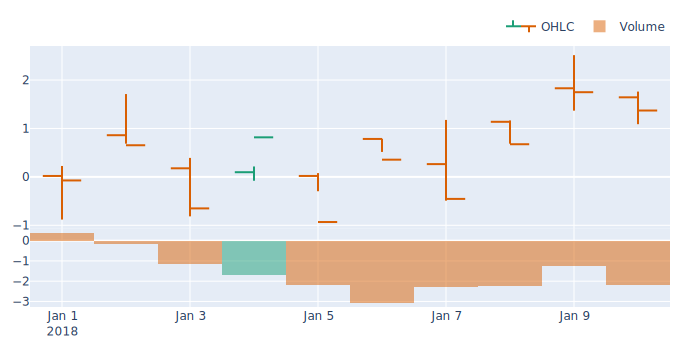

In [8]:
# Specify them manually
ohlcv_ts.vbt.ohlcv(column_names={
    'open': 'open', 
    'high': 'high', 
    'low': 'low', 
    'close': 'close', 
    'volume': 'volume'
}).plot().show_svg()

In [9]:
# Or by changing the defaults
vbt.settings.ohlcv['column_names'] = {
    'open': 'open', 
    'high': 'high', 
    'low': 'low', 
    'close': 'close', 
    'volume': 'volume'
}

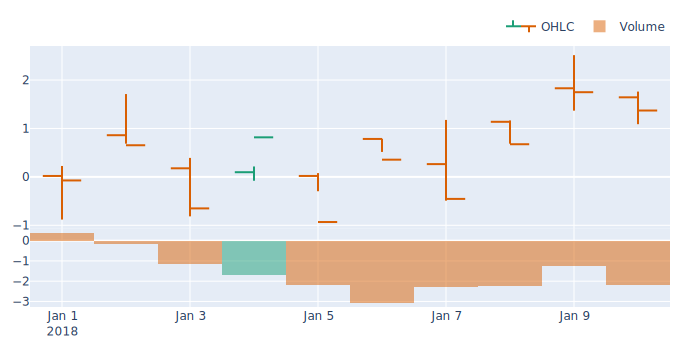

In [10]:
ohlcv_ts.vbt.ohlcv.plot().show_svg()